In [31]:
%matplotlib nbagg

In [32]:
import hyperspy.api as hs
import EELS.EELS as eels
import numpy as np
import matplotlib.pyplot as plt

In [33]:
positions = [[0.3333333333333357,  0.6666666666666643,  0.9996814330926364],
             [0.6666666666666643,  0.3333333333333357,  0.4996814330926362],
             [0.3333333333333357,  0.6666666666666643,  0.3787615522102606],
             [0.6666666666666643,  0.3333333333333357,  0.8787615522102604]]

numbers = [30, 30, 8, 8]

atoms = []
for i, position in enumerate(positions):
    atoms.append(eels.Atom(numbers[i],position))
atoms

In [34]:
cell = eels.Cell(lattice = np.array([
                    [ 3.2871687359128612, 0.0000000000000000, 0.0000000000000000],
                    [-1.6435843679564306, 2.8467716318265182, 0.0000000000000000],
                    [ 0.0000000000000000, 0.0000000000000000, 5.3045771064003047]]),
                atoms=atoms)

In [47]:
model = eels.ModelSystem(cell=cell)
model.spaceGroup()

model.meshgrid(pointDensity=np.array([61,61,61]))

model.addParabolicBand(energy_offset=0.0, effective_mass=np.array([-1, -1, -1]), k_center=np.array([0, 0, 0]))
model.addParabolicBand(energy_offset=3.3, effective_mass=np.array([ 1,  1,  1]), k_center=np.array([0, 0, 0]))

energyBins = np.linspace(2,5,100)

print(model.diffractionGrid()[1])

print(model.cell.brillouinZone)

[117 135  72]
[[ 1.91142768  1.10356328 -0.        ]
 [ 0.          2.20712657  0.        ]
 [ 0.         -0.          1.18448374]]


In [48]:
A = model.calculateScatteringCrossSection(energyBins, fermiEnergy=1.65)

In [49]:
nonzero =np.where(A.data)[0].shape[0]

In [50]:
total = (A.data.shape[0]*A.data.shape[1]*A.data.shape[2]*A.data.shape[3])

In [51]:
nonzero/total

0.02937914600260279

<IPython.core.display.Javascript object>


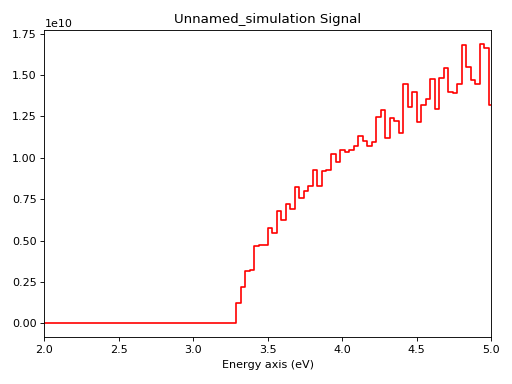

/home/sindrerb/anaconda3/envs/hySpy2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [57]:
A.sum().plot()

<IPython.core.display.Javascript object>


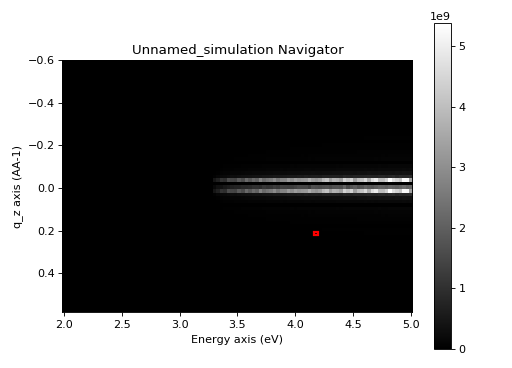

<IPython.core.display.Javascript object>


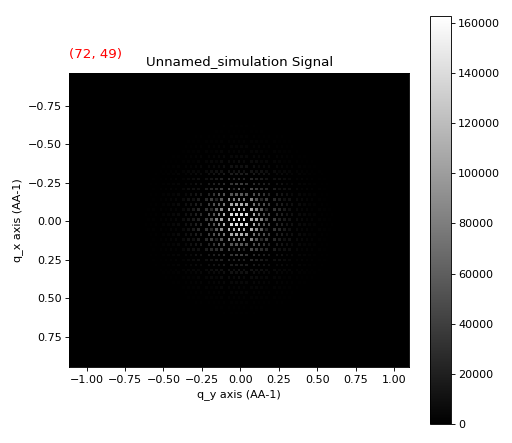

In [54]:
A.as_signal2D((1,2)).plot()